In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [82]:
data = pd.read_csv('data.csv')
data

,x1,x2
0,-6.111197,1.471531
1,-7.496654,0.913425
2,-10.844898,-7.553523
3,-4.543377,-2.135686
4,-1.913821,-0.034780
...,...,...
1495,-8.527192,-6.726876
1496,-3.271435,2.243791
1497,1.649903,-0.201178
1498,0.792307,0.608689


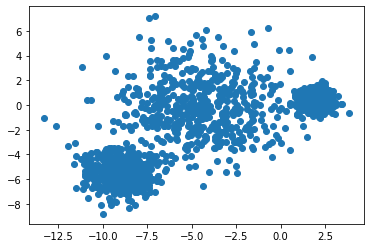

In [83]:
X = data[["x1", "x2"]].values

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])

# K-Means Clustering
- Init centers
- While not converged:
  - Update cluster membership
  - Update centers

In [84]:
def Kmeans(X,k):
  n = X.shape[0]
  centers = X[np.random.choice(n, k, replace=False)]
  closest = np.zeros(n).astype(int)

  while True:
    old_closest = closest.copy()
    distances = cdist(X,centers)
    
    closest = np.argmin(distances, axis=1)
    
    for i in range(k):
      centers[i, :] = X[closest == i].mean(axis = 0)
    

    if all(closest == old_closest):
      break

  return closest, centers

In [85]:
labels, centers = Kmeans(X,3)

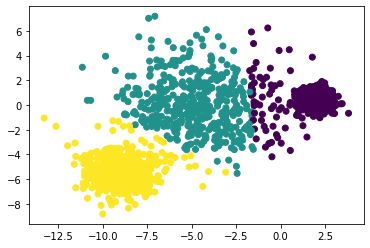

In [86]:
plt.scatter(X[:,0],X[:,1],c=labels)

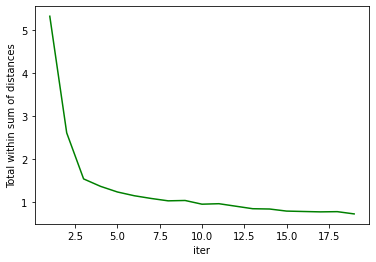

In [87]:
sum_of_squared_distances = []
H = range(1,20)

for h in H:
  labels, centers = Kmeans(X,h)
  sum_of_squared_distances.append(np.average(np.min(cdist(data, centers), axis=1))) # WCV

# Plot
plt.plot(H, sum_of_squared_distances, 'g-')
plt.xlabel('iter')
plt.ylabel('Total within sum of distances')
plt.show()  